In [28]:
from ch_shrinkwrap import shape
from PYME.IO import tabular
import numpy as np

In [2]:
# Create a torus
R = 50
r = 30
t = shape.Torus(R, r)
pts_t_raw = t.points(1)

In [3]:
# Monte-carlo reject
ps = [0,0.9,0.99]  # as percent of points
noises = [0,0.1*R,R]  # as percent of radius
for p in ps:
    for n in noises:
        rn = np.random.rand(pts_t_raw.shape[0])
        pts_t = pts_t_raw[rn>p]
        pts_t += n*np.random.randn(*pts_t.shape)
        np.savetxt("torus_R{}_r{}_p{}_n{}".format(R, r, p, n).replace(".","_")+".txt",pts_t)

In [4]:
# Create a sphere
s = shape.Sphere(R)
pts_raw = s.points(1)

In [5]:
# Monte-carlo reject
for p in ps:
    for n in noises:
        rn = np.random.rand(pts_raw.shape[0])
        pts = pts_raw[rn>p]
        pts += n*np.random.randn(*pts.shape)
        np.savetxt("sphere_R{}_p{}_n{}".format(R, p, n).replace(".","_")+".txt",pts)

In [34]:
import matplotlib.pyplot as plt

nps = len(ps)
nns = len(noises)

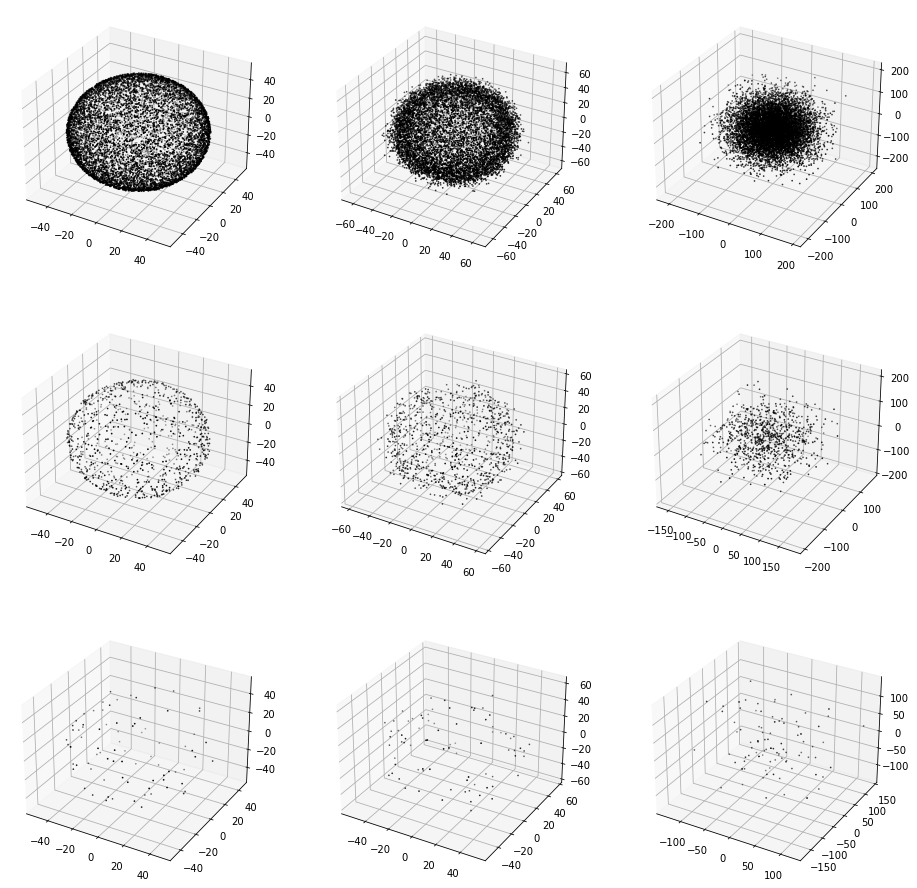

In [32]:
fig = plt.figure(figsize=(16,16))

# Plot spheres
for _ip in range(nps):
    for _in in range(nns):
        curr_plot = int("{}{}{}".format(nps,nns,_ip*nns+_in+1))
        ax = fig.add_subplot(curr_plot, projection='3d')
        x,y,z = np.loadtxt("sphere_R{}_p{}_n{}".format(R, ps[_ip], noises[_in]).replace(".","_")+".txt").T
        ax.scatter(x,y,z,c='k',s=0.5)

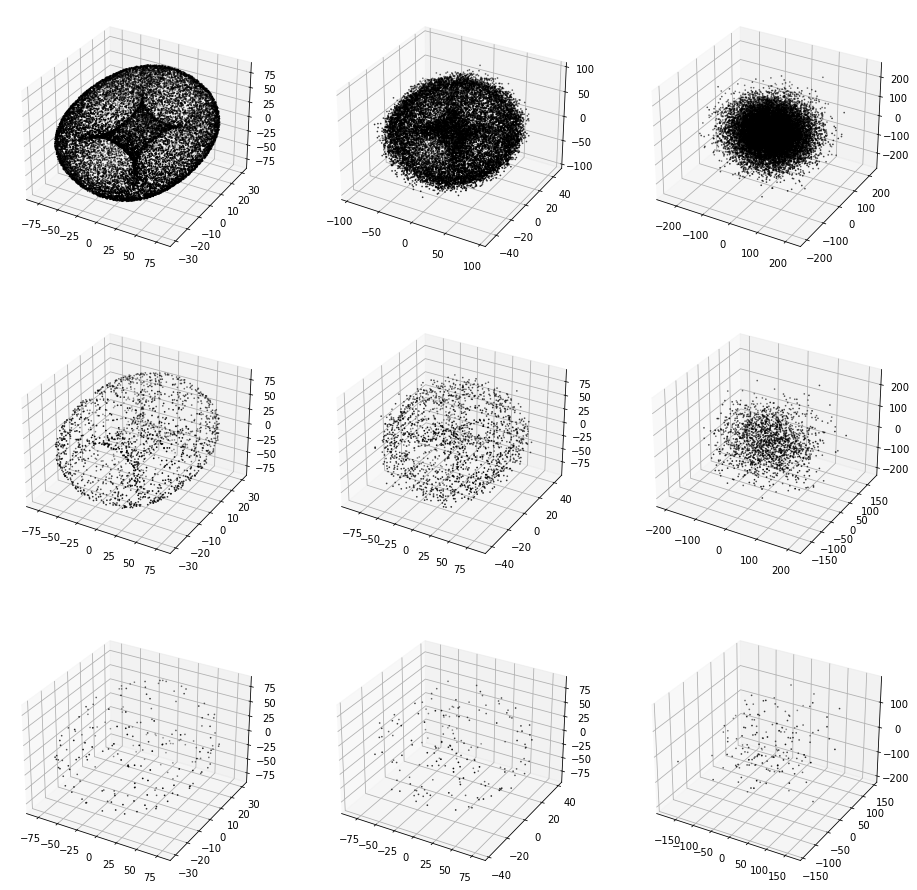

In [33]:

fig = plt.figure(figsize=(16,16))

# Plot spheres
for _ip in range(nps):
    for _in in range(nns):
        curr_plot = int("{}{}{}".format(nps,nns,_ip*nns+_in+1))
        ax = fig.add_subplot(curr_plot, projection='3d')
        x,y,z = np.loadtxt("torus_R{}_r{}_p{}_n{}".format(R, r, ps[_ip], noises[_in]).replace(".","_")+".txt").T
        ax.scatter(x,y,z,c='k',s=0.5)

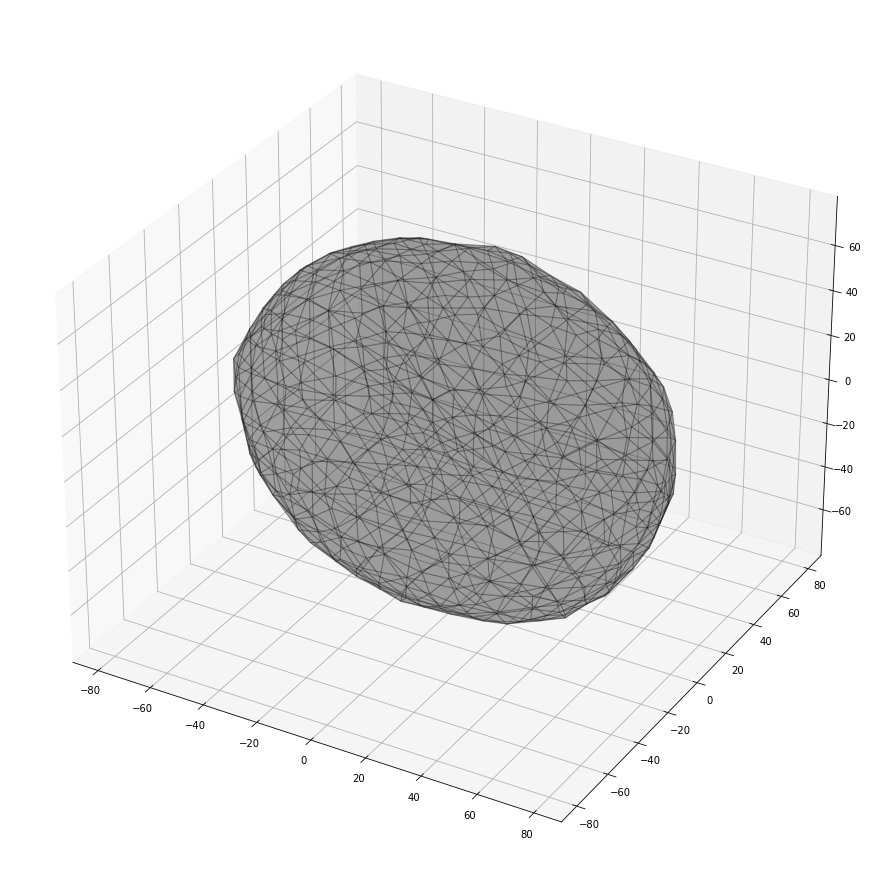

In [41]:
from stl import mesh
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')

your_mesh = mesh.Mesh.from_file('hemo.stl')
ax.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors, linewidths=1, alpha=0.2, facecolor='k', edgecolor='k'))
# Auto scale to the mesh size
scale = your_mesh.points.flatten()
ax.auto_scale_xyz(scale, scale, scale)

NameError: name 'pipeline' is not defined